In [206]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
url ='https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'

In [124]:
dados = pd.read_csv(url)
dados.shape

(10008, 8)

In [125]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
450,NaN,Alto de Pinheiros,São Paulo,400,4,3,4,R$ 2.111.000
9381,NaN,Vila Mariana,São Paulo,132,4,4,6,R$ 1.200.000
9467,NaN,Vila Campo Grande,São Paulo,70,2,1,1,R$ 428.000
4013,NaN,Jardim Paulista,São Paulo,250,4,3,6,R$ 8.000.000
9865,Rua Ministro Sinésio Rocha,Jardim Vera Cruz,São Paulo,389,3,6,2,R$ 1.800.000
2519,NaN,Boaçava,São Paulo,540,4,5,6,R$ 5.000.000
619,"Rua Manaus, 48",Vila Bertioga,São Paulo,450,3,2,4,R$ 1.600.000
9662,"Rua Bertioga, 493",Chácara Inglesa,São Paulo,103,2,1,1,R$ 720.001
7554,NaN,Brooklin Paulista,São Paulo,330,5,6,5,R$ 2.280.000
9788,Rua Doutor José Maria Whitaker,Vila Sônia,São Paulo,264,3,2,2,R$ 1.568.000


In [126]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [127]:
dados.Bairro.loc[6522]

'Vila Paulo Silas'

In [128]:
valores = dados.groupby(['Bairro'])['Metragem'].mean()
valores

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

In [129]:
dados.Metragem.mean()

442.30065947242207

In [130]:
dados['Bairro'] == 'Vila Mariana'

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [131]:
sum((dados['Bairro'] == 'Vila Mariana'))

184

In [132]:
imoveis_vila_mariana = (dados['Bairro'] == 'Vila Mariana')
(imoveis_vila_mariana)*1

0        0
1        0
2        0
3        0
4        0
        ..
10003    0
10004    0
10005    0
10006    0
10007    0
Name: Bairro, Length: 10008, dtype: int64

In [133]:
total_imoveis_vila_mariana = dados[imoveis_vila_mariana]
total_imoveis_vila_mariana.Metragem.mean()

233.6195652173913

In [134]:
dados_sem_na.Metragem.max()

750000

In [135]:
dados.Bairro.value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

<AxesSubplot:>

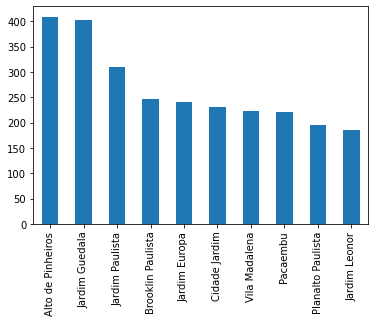

In [136]:
n_imoveis_bairros = dados_sem_na.Bairro.value_counts()
n_imoveis_bairros.head(10).plot.bar()

Desafios:

- Media de metragem para cada um dos bairros - Resposta: {metragem_bairros = pd.DataFrame(dados_sem_na.groupby(['Bairro'])['Metragem'].mean())}
- 2 formas de buscar por bairro - resposta: (consultar os metodos na documentação Pandas)
- explorar alguns graficos na documentacao e aplicar nas demais colunas do df, tirar conclusoes Resposta: (grafico_1.head(10).plot.pie())
- pegar outras estatisticas dos dados e buscar conclusoes - Resposta: (dados.describe())
- Quais os bairros que nao tem rua - resposta: (sem_rua2.Bairro.value_counts())

In [137]:
dados_sem_na = dados.dropna(subset = ['Bairro'])
dados_sem_na

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [138]:
dados_sem_na = dados.replace(np.nan, 'Sem Rua')
dados_sem_na

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,Sem Rua,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [139]:
dados_na = dados_sem_na['Rua'] == 'Sem Rua'

In [140]:
sem_rua2 = dados_sem_na[dados_na]
sem_rua2

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,Sem Rua,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,Sem Rua,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,Sem Rua,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,Sem Rua,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,Sem Rua,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9963,Sem Rua,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
9989,Sem Rua,Parque Alves de Lima,São Paulo,127,2,1,2,R$ 400.000
9991,Sem Rua,Vila Formosa,São Paulo,145,3,2,3,R$ 750.000
9995,Sem Rua,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000


In [141]:
sem_rua2.Bairro.value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

<AxesSubplot:ylabel='Bairro'>

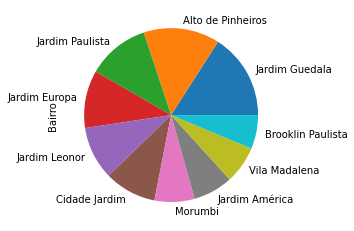

In [142]:
grafico_1 = sem_rua2.Bairro.value_counts()
grafico_1.head(10).plot.pie()

In [143]:
dados[['Rua','Bairro']].value_counts()

Rua                              Bairro                 
Rua Alberto Faria                Alto de Pinheiros          24
Avenida das Magnólias            Cidade Jardim              21
Rua Sampaio Vidal                Jardim Paulistano          19
Rua Comandante Ismael Guilherme  Jardim Luzitânia           18
Rua Mesquita                     Vila Deodoro               18
                                                            ..
Rua Faria Lobato                 Vila Santa Clara            1
Rua Falchi Gianini, 497          Vila Prudente               1
Rua Fabiano Alves                Parque da Vila Prudente     1
Rua Eça de Queiróz               Vila Mariana                1
Rua Guarei                       Vila Bertioga               1
Length: 3179, dtype: int64

In [144]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [145]:
metragem_bairros = pd.DataFrame(dados_sem_na.groupby(['Bairro'])['Metragem'].mean())
metragem_bairros

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


# AULA 2 - TRATAMENTO DE DADOS E PRIMEIROS GRAFICOS 

In [146]:
dados['Valor'][0]

'R$ 7.000.000'

Utilizado para dividir Int de strings para analisar 

In [147]:
dados['Valor'][0].split()

['R$', '7.000.000']

In [148]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4489,NaN,Alto de Pinheiros,São Paulo,534,3,3,2,R$ 5.500.000
8114,"Rua Engenheiro Artur de Miranda, , 187",Butantã,São Paulo,180,3,2,3,R$ 900.000
2853,Rua Antônio de Gouveia Giudice,Alto de Pinheiros,São Paulo,660,3,6,5,R$ 7.000.000
4044,NaN,Jardim Europa,São Paulo,186,3,5,4,R$ 4.700.000
7770,"Rua Manoel Pires do Valle, 146",Vila Domitila,São Paulo,170,3,2,3,R$ 549.000
1511,NaN,Jardim Paulista,São Paulo,440,4,4,2,R$ 3.195.000
5452,Rua ESão Pauloírito Santo,Aclimação,São Paulo,255,6,4,2,R$ 1.940.000
6456,"Rua Manduri, 671",Jardim Paulistano,São Paulo,455,4,4,3,R$ 3.620.000
389,NaN,Vila Brasilina,São Paulo,187,3,1,5,R$ 690.000
9799,"Rua Rosa Mística, 151",Vila Campestre,São Paulo,130,3,4,2,R$ 530.000


In [149]:
dados['Valor'][7437].split()

['R$', '8.000', '/Mês']

In [150]:
#separação de todos os elementos strings de Int
#Expand serve para criar automaticamente as colunas no DF original

In [151]:
dados.Valor.str.split(expand = True) 

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [152]:
dados.Valor.str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

In [153]:
dados.Valor.str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [154]:
len(dados.Valor.str.split(expand = True)[1].unique())

1038

In [155]:
dados.Valor.str.split(expand = True)[1].value_counts()

2.500.000     182
3.500.000     174
1.200.000     170
1.600.000     151
1.500.000     150
             ... 
3.064.000       1
3.800           1
2.022.000       1
2.440.000       1
15.499.000      1
Name: 1, Length: 1038, dtype: int64

Com o expand já é possível agregarmos colunas novas diretamente no nosso dataframe principal 

In [156]:
dados[['Moeda','Valor_Anuncio','Tipo_anuncio']] = dados.Valor.str.split(expand = True)
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_anuncio
9498,Rua Conceição de Monte Alegre,Cidade Monções,São Paulo,95,2,2,1,R$ 636.000,R$,636.000,None
2168,NaN,Jardim Morumbi,São Paulo,620,4,4,10,R$ 4.900.000,R$,4.900.000,None
3555,Rua Nabih Assad Abdalla,Vila Morumbi,São Paulo,540,4,3,2,R$ 3.850.000,R$,3.850.000,None
2244,NaN,Vila Madalena,São Paulo,605,4,6,6,R$ 7.000.000,R$,7.000.000,None
7157,Rua São Ludgero,Granja Julieta,São Paulo,246,4,4,3,R$ 2.550.000,R$,2.550.000,None
1701,NaN,Jardim Prudência,São Paulo,418,4,6,4,R$ 1.950.000,R$,1.950.000,None
2797,Rua Escobar Ortiz,Vila Nova Conceição,São Paulo,190,3,3,2,R$ 9.000\n /Mês,R$,9.000,/Mês
7332,NaN,Campo Belo,São Paulo,214,4,5,4,R$ 2.500.000,R$,2.500.000,None
1718,NaN,Chácara Califórnia,São Paulo,130,3,5,2,R$ 680.000,R$,680.000,None
8956,NaN,Jardim Campo Grande,São Paulo,295,3,3,5,R$ 1.700.000,R$,1.700.000,None


In [119]:
dados[dados['Tipo_anuncio'].isnull()]['Tipo_anuncio'].unique()

array([None], dtype=object)

In [171]:
dados_vendas = dados[dados['Tipo_anuncio'].isnull()]

In [172]:
dados_vendas.shape

(9156, 11)

In [173]:
dados.shape

(10008, 11)

In [174]:
dados_vendas['Valor_anuncio_float'] = dados_vendas['Valor_Anuncio'].str.replace('.','').astype(float)

/var/folders/jq/p6245ypn28d3k9264d8nzq_h0000gn/T/ipykernel_735/4294254824.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas['Valor_anuncio_float'] = dados_vendas['Valor_Anuncio'].str.replace('.','').astype(float)
/var/folders/jq/p6245ypn28d3k9264d8nzq_h0000gn/T/ipykernel_735/4294254824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['Valor_anuncio_float'] = dados_vendas['Valor_Anuncio'].str.replace('.','').astype(float)


<AxesSubplot:ylabel='Frequency'>

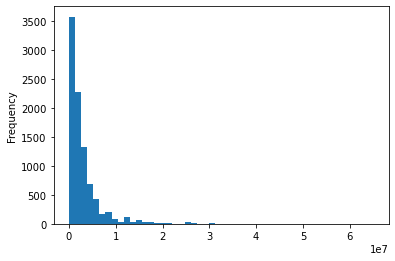

In [183]:
dados_vendas['Valor_anuncio_float'].plot.hist(bins = 50)

In [197]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [200]:
dados_vendas.describe(include = 'all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


In [201]:
dados_vendas[['Rua','Bairro', 'Cidade']].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


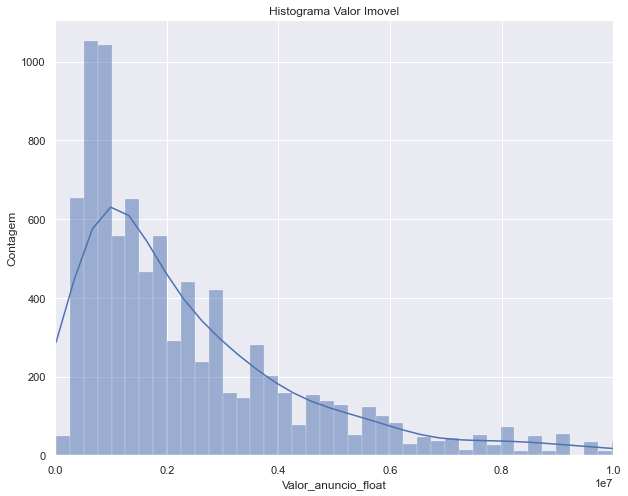

In [216]:
sns.set()
plt.figure(figsize = (10,8))
ax = sns.histplot(data = dados_vendas, x = 'Valor_anuncio_float', kde = True)
ax.set_title('Histograma Valor Imovel')
ax.set_ylabel('Contagem')
plt.xlim((-50, 10000000))
plt.show()

# Aula 2 

# Desafio 1 
### Criar uma escala de valores em milhões

# Desafio 2 

- criar uma escala em milhões
- deixar o grafico do histograma de valores de imoveis de SP (bonitão) - label, titulos, scala, cores
- Boxplot para retirar os outliers 

# Desafio 3

- preço do m2 por Bairro
- plotar em um grafico de dispersão/ lineas/ 


# Desafio 4

- explorar as bibliotecas de visualizações e colocar suas conclusões


# Desafio 5

- pesquisar uma visualização para analisar os quartis, mediana e outliers 